# TECH CHALLENGE – FASE 3: PIPELINE DE MODELO

**Base de Dados:** [base_dados_traduzida.csv](https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv)

**Objetivo:**
1. **Modelo de Classificação** – Prever se um cliente vai pagar a dívida, ajudando a decidir se o empréstimo deve ser aprovado ou não.  
2. **Modelo de Regressão** – Nos casos em que o empréstimo não for aprovado, estimar um valor de crédito que poderia ser concedido ao cliente.


# IMPORTAR BASE DE DADOS

In [46]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [47]:
data = pd.read_csv('data/credit_score.csv')
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [48]:
print(f"SHAPE: {data.shape}")
print(data.info())

SHAPE: (1000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade           

# TRATAMENTO DE DADOS

## No Brasil, a informação sobre a **orientação sexual** é considerada **dado sensível** pela LGPD.  
Por esse motivo, vamos remover essa variável da base de dados.  

🔗 Referência: [Portal LNCC – LGPD: O que são dados sensíveis?](https://www.gov.br/lncc/pt-br/centrais-de-conteudo/campanhas-de-conscientizacao/campanha-lgpd/2025/lgpd-o-que-sao-dados-sensiveis)


In [49]:
data['sexo_est_civil'].unique()

array(['male : single', 'female : divorced/separated/married',
       'male : divorced/separated', 'male : married/widowed'],
      dtype=object)

In [50]:
# AQUI VAMOS SEPARAR OS DADOS DE ESTADO CIVIL E SEXO E REMOVER A COLUNA ORIGINAL
est_civil = []
for current_info in data['sexo_est_civil']:
    est_civil.append(current_info[current_info.index(':')+1:].strip() == 'single')
est_civil
data['est_civil'] = [1 if x else 0 for x in est_civil]
data = data.drop(columns=['sexo_est_civil'])
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


# DADOS COMO STRING -> DADOS NUMÉRICOS
# Vamos transformar as variáveis categóricas em dados numéricos,
# usando codificação binária (0/1) ou uma sequência ordinal (0,1,2...),
# Isso facilita a implementação e o treinamento dos modelos de Machine Learning

## CONTA CORRENTE

In [51]:
data['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [52]:
# contas negativas ou sem conta corrente = 0
# contas positivas = 1

conta_corrente_map = {
    'no checking account': 0,
    '< 0 DM': 0
}

data['conta_corrente'] = data['conta_corrente'].map(lambda x: conta_corrente_map.get(x, 1))
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


# historico_credito

In [53]:
data['historico_credito'].unique()

array(['critical account/ other credits existing (not at this bank)',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'no credits taken/ all credits paid back duly',
       'all credits at this bank paid back duly'], dtype=object)

In [54]:
# 0 = alto risco
# 1 = baixo risco

credit_history_map = {
    'critical account/ other credits existing (not at this bank)': 0,
    'delay in paying off in the past': 0,
    'existing credits paid back duly till now': 1,
    'no credits taken/ all credits paid back duly': 1,
    'all credits at this bank paid back duly': 1
}

data['historico_credito'] = data['historico_credito'].map(credit_history_map)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


## proposito_emprestimo

In [55]:
data['proposito_emprestimo'].unique()

array(['domestic appliances', '(vacation - does not exist?)',
       'radio/television', 'car (new)', 'car (used)', 'business',
       'repairs', 'education', 'furniture/equipment', 'retraining'],
      dtype=object)

In [56]:
purpose_map = {
    'domestic appliances': 0,
    '(vacation - does not exist?)': 0,
    'radio/television': 0,
    'car (new)': 1,
    'car (used)': 1,
    'business': 1,
    'repairs': 0,
    'education': 1,
    'furniture/equipment': 1,
    'retraining': 1
}

data['proposito_emprestimo'] = data['proposito_emprestimo'].map(purpose_map)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,unknown/ no savings account,.. >= 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,... < 100 DM,1 <= ... < 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,2096,... < 100 DM,4 <= ... < 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,7882,... < 100 DM,4 <= ... < 7 years,2,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,4870,... < 100 DM,1 <= ... < 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


## reserva_cc

In [57]:
data['reserva_cc'].unique()

array(['unknown/ no savings account', '... < 100 DM',
       '500 <= ... < 1000 DM ', '.. >= 1000 DM ', '100 <= ... < 500 DM'],
      dtype=object)

In [58]:
savings_map = {
    'unknown/ no savings account': 0,
    '... < 100 DM': 0,
    '100 <= ... < 500 DM': 0,
    '500 <= ... < 1000 DM ': 1,
    '.. >= 1000 DM ': 1
}

data['reserva_cc'] = data['reserva_cc'].map(savings_map)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,.. >= 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,0,1 <= ... < 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,2096,0,4 <= ... < 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,7882,0,4 <= ... < 7 years,2,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,4870,0,1 <= ... < 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


## tempo_emprego_atual

In [59]:
data['tempo_emprego_atual'].unique()

array(['.. >= 7 years', '1 <= ... < 4 years', '4 <= ... < 7 years',
       'unemployed', '... < 1 year '], dtype=object)

In [60]:
employment_map = {
    'unemployed': 0,
    '... < 1 year ': 0,
    '1 <= ... < 4 years': 1,
    '4 <= ... < 7 years': 1,
    '.. >= 7 years': 1
}

data['tempo_emprego_atual'] = data['tempo_emprego_atual'].map(employment_map)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,1,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,0,1,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,2096,0,1,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,7882,0,1,2,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,4870,0,1,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


## outros_fiadores

In [61]:
data['outros_fiadores'].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [62]:
data['outros_fiadores'] = data['outros_fiadores'].map(lambda x: 0 if x == 'none' else 1)
data.head()


,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,1,4,0,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,0,1,2,0,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,2096,0,1,2,0,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,7882,0,1,2,1,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,4870,0,1,3,0,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


## propriedade

In [63]:
data['propriedade'].unique()

array(['real estate',
       'if not A121 : building society savings agreement/ life insurance',
       'unknown / no property',
       'if not A121/A122 : car or other, not in attribute 6'],
      dtype=object)

In [64]:
property_map = {
    'unknown / no property': 0,
    'if not A121 : building society savings agreement/ life insurance': 1,
    'if not A121/A122 : car or other, not in attribute 6': 1,
    'real estate': 2
}

data['propriedade'] = data['propriedade'].map(property_map)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,1,4,0,4,2,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,0,1,2,0,2,2,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,2096,0,1,2,0,3,2,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,7882,0,1,2,1,4,1,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,4870,0,1,3,0,4,0,53,none,for free,2,skilled employee / official,2,none,yes,1


## outros_planos_financiamento

In [65]:
data['outros_planos_financiamento'].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [66]:
data['outros_planos_financiamento'] = data['outros_planos_financiamento'].map(lambda x: 0 if x == 'none' else 1)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,1,4,0,4,2,67,0,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,0,1,2,0,2,2,22,0,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,2096,0,1,2,0,3,2,49,0,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,7882,0,1,2,1,4,1,45,0,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,4870,0,1,3,0,4,0,53,0,for free,2,skilled employee / official,2,none,yes,1


## tipo_residencia

In [69]:
data['tipo_residencia'].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [70]:
data['tipo_residencia'] = data['tipo_residencia'].map(lambda x: 1 if x in ['own', 'for free'] else 0)
data.head()


,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,3807.350332,0,1,4,0,4,2,67,0,1,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,19381.986164,0,1,2,0,2,2,22,0,1,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,6826.523778,0,1,2,0,3,2,49,0,1,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,25671.116610,0,1,2,1,4,1,45,0,1,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,15861.245609,0,1,3,0,4,0,53,0,1,2,skilled employee / official,2,none,yes,1


## status_emprego

In [71]:
data['status_emprego'].unique()

array(['skilled employee / official', 'unskilled - resident',
       'management/ self-employed/ highly qualified employee/ officer',
       'unemployed/ unskilled - non-resident'], dtype=object)

In [72]:
status_emprego_map = {
    'unemployed/ unskilled - non-resident': 0,
    'unskilled - resident': 0,
    'skilled employee / official': 1,
    'management/ self-employed/ highly qualified employee/ officer': 2
}

data['status_emprego'] = data['status_emprego'].map(status_emprego_map)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,3807.350332,0,1,4,0,4,2,67,0,1,2,1,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,19381.986164,0,1,2,0,2,2,22,0,1,1,1,1,none,yes,0
2,0,0,12,0,0,6826.523778,0,1,2,0,3,2,49,0,1,1,0,2,none,yes,1
3,0,0,42,1,0,25671.116610,0,1,2,1,4,1,45,0,1,1,1,2,none,yes,1
4,1,0,24,0,1,15861.245609,0,1,3,0,4,0,53,0,1,2,1,2,none,yes,1


## CONVERTER VALOR DO EMPRÉSTIMO PARA R$

## Deutsche Mark (DM) não é mais utilizada atualmente. Vamos substituir os valores por Euro (€) e converter para Real (BRL) considerando a cotação de 1 Euro = R$ 6,37.

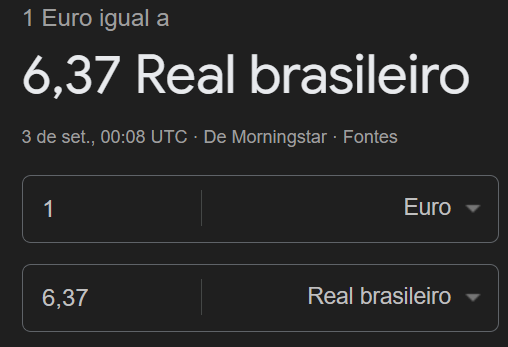

In [67]:
data['valor_emprestimo'].head()

0    1169
1    5951
2    2096
3    7882
4    4870
Name: valor_emprestimo, dtype: int64

In [68]:
dm_to_euro = 1 / 1.95583  # 1 Euro = 1,95583 DM
euro_to_brl = 6.37  # 1 Euro = 6,37 BRL
data['valor_emprestimo'] = data['valor_emprestimo'].apply(lambda x: x * dm_to_euro * euro_to_brl)
data.head()


,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,3807.350332,0,1,4,0,4,2,67,0,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,19381.986164,0,1,2,0,2,2,22,0,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,6826.523778,0,1,2,0,3,2,49,0,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,25671.116610,0,1,2,1,4,1,45,0,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,15861.245609,0,1,3,0,4,0,53,0,for free,2,skilled employee / official,2,none,yes,1
